# Implementación de Optimización por enjambre de partículas (PSO)
> **Nombres:** \
 Benites Onofre Fernando Gabriel \
 Barajas Ruíz Leslie

``` 
Establece el modelo matemático describiendo sus etapas, elabora el algoritmo secuencial del PSO, desarrolla un conjunto de pruebas (al menos 2), implementa el algoritmo secuencial, lleva acabo la ejecución correcta de las pruebas. 
```

## Modelo Matemático para describir etapas


En primer lugar, vemos las etapas del algoritmo de PSO, con base a eso, lo describiremos en cada etapa.
> -> **Inicializar la población de las partículas** \
-> **Evaluar la población en la función objetivo y elegir la mejor partícula** \
-> **while (criterio de paro)** \
-> **for (todas las partículas en todas las dimensiones)** \
-> **Generar una nueva velocidad** \
-> **Calcular una nueva posición** \
-> **Evaluar la función objetivo y elegir la mejor partícula** \
-> **end for** \
-> **Actualizar la mejor partícula de la población** \
-> **end while**

De esta manera describamos cada etapa en el mismo orden en que se enlistaron: Sea P la población de las partículas
- La inicialización de las partículas depende de asignarles a cada partícula una posición aleatoria, es decir: Sea $X^i(t=1)$ la posición de la i-ésima Partícula en la primer iteración $(t=1)$, es decir $$X^i(t=1) = rand(d, [-10,10])$$ donde d es la dimensión del espacio de la Población. En el caso de inicializar la velocidad, también lo hacemos de manera aleatoria $$V^i(t=1) = rand(d, [-10,10])$$
- La función objetivo que utlizaremos es la siguiente: $$f(X) = \sum_{i=1}^{d-1} (100(x_i - x_{i+1})^2 + (x_i - 1)^2), \quad x_i\in[-10,10]$$ En el caso de la mejor partícula, en ésta nos limitaremos a elegir el mínimo de la función anteriormente descrita, es decir $$best\_X := min\{f(X_i):X_i\in P\}$$
- Nuestro criterio de paro depende del número de iteraciones, en este caso será $N\_paro = 500$.
- Al entrar en el **for** tenemos la ecuación para generar las nuevas velocidades y posiciones $${\bf{\text{Nueva velocidad }}}V^{i}(t+1) = V^{i}(t) + rand1(pbest^{i} - X^t(t)) + rand2(gbest-X^{t}(t))$$ $${\bf{\text{Nueva posición }}}X^i(t+1) = X^i(t) + V^i (t+1)$$ donde $pbest^{i}$ es la mejor i-ésima partícula (local). $gbest$ es la mejor partícula global.
- Al actualizar la mejor partícula de la población, simplemente vemos si en alguna iteración del for se consiguió un "mejor" mínimo. 

## Algoritmo secuencial

In [1]:
import numpy as np
# %matplotlib inline
# import numpy as np
# import matplotlib.pyplot as plt
from time import time

In [2]:
# Función objetivo

def Rosenbrock(x):
    d = len(x) # Dimensión de nuestro espacio
    total_sum = 0
    for i in range(d-1):
        total_sum += 100*(-x[i]**2 + x[i+1])**2 + (x[i]-1)**2
    return total_sum

# Función objetivo extra para pruebas con mínimo global en (0,0) y f = 0

def f_x2y2(x): # función definida sólo para R^2 (dimensión 2)
    return x[0]**2 + x[1]**2

In [3]:
# Implementación secuencial

def PSO_sequential(n_P, d, l, u, f):
    # Inicialización 
    X = np.zeros((n_P, d))
    V = np.zeros((n_P, d))
    
    for i in range(n_P):
        for j in range(d):
            X[i][j] += l + np.random.rand(u-l)[0]
    
    for i in range(n_P):
        for j in range(d):
            V[i][j] += np.random.rand(1)
            
    # Evaluar la población en la función objetivo y elegir la mejor partícula
    pbest = X # local
    gbest_f = f(X[0]) # global
    gbest = X[0]
    
    for i in range(1,len(X)):
        new_val_f = f(X[i])
        if new_val_f < f(X[0]):
            gbest_f = new_val_f
            gbest = X[i]
            
    # while (condición de paro)
    stop_condition = 500 
    while stop_condition > 0: 
        for i in range(len(X)):
            # Nueva velocidad  
            V = V + np.random.rand(1)[0]*(pbest - X) + np.random.rand(1)[0]*(gbest - X)
            # Nueva posición
            X = X + V
                
            if f(pbest[i]) > f(X[i]):
                pbest[i] = X[i]
                
        for i in pbest:
            # Evaluar función objetivo y elegir mejor partícula
            if f(i) < f(gbest):
                gbest = i
                
        stop_condition -= 1

    return pbest, gbest, f(gbest) 

In [6]:
# test con función de Rosenbrock
pbest1, gbest1, f1 = PSO_sequential(20, 2, -5, 10, Rosenbrock)
print(f'Primer test con mínimo en [1,1] f=0, con algoritmo nos dice que la aproximación es {gbest1} y función valuada = {Rosenbrock(gbest1)}')

Primer test con mínimo en [1,1] f=0, con algoritmo nos dice que la aproximación es [0.57135941 0.30838778] y función valuada = 0.21636282380506527


/var/folders/ln/r540h4b11mv526rjsf8_kdy40000gn/T/ipykernel_4305/4220155902.py:7: RuntimeWarning: overflow encountered in double_scalars
  total_sum += 100*(-x[i]**2 + x[i+1])**2 + (x[i]-1)**2


In [8]:
# test con la función f = x^2 + y^2
pbest2, gbest2, f2 = PSO_sequential(20, 2, -5, 10, f_x2y2)
print(f'Segundo test con mínimo en [0,0] f=0, con algoritmo nos dice que la aproximación es {gbest2} y función valua = {f_x2y2(gbest2)}')

Segundo test con mínimo en [0,0] f=0, con algoritmo nos dice que la aproximación es [-0.32427485  0.08629596] y función valua = 0.11260117277832542


#### Para el ánalisis de escalabilidad, pondremos a prueba nuestra función para ciertas cantidades de partículas.

In [51]:
n_P = [50,100,200,300,400,500,600,700,800,900]
list_times = []
for i in n_P:
    start_time = time()
    PSO_sequential(i, 2, -5, 10, Rosenbrock)
    final_time = time() - start_time
    list_times.append(final_time)

C:\Users\User\AppData\Local\Temp\ipykernel_15336\2759254098.py:7: RuntimeWarning: overflow encountered in double_scalars
  total_sum += 100*(-x[i]**2 + x[i+1])**2 + (x[i]-1)**2
C:\Users\User\AppData\Local\Temp\ipykernel_15336\288968769.py:34: RuntimeWarning: overflow encountered in add
  X = X + V
C:\Users\User\AppData\Local\Temp\ipykernel_15336\288968769.py:34: RuntimeWarning: invalid value encountered in add
  X = X + V
C:\Users\User\AppData\Local\Temp\ipykernel_15336\288968769.py:32: RuntimeWarning: overflow encountered in add
  V = V + np.random.rand(1)[0]*(pbest - X) + np.random.rand(1)[0]*(gbest - X)
C:\Users\User\AppData\Local\Temp\ipykernel_15336\288968769.py:32: RuntimeWarning: invalid value encountered in add
  V = V + np.random.rand(1)[0]*(pbest - X) + np.random.rand(1)[0]*(gbest - X)
C:\Users\User\AppData\Local\Temp\ipykernel_15336\2759254098.py:7: RuntimeWarning: invalid value encountered in double_scalars
  total_sum += 100*(-x[i]**2 + x[i+1])**2 + (x[i]-1)**2


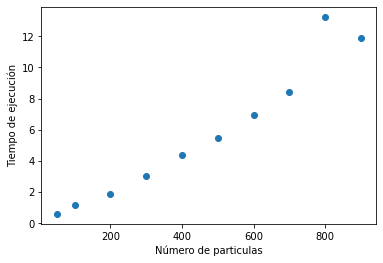

In [50]:
# Crear la figura y los ejes
fig, ax = plt.subplots()
ax.scatter(x = n_P, y = list_times)
plt.xlabel('Número de particulas')
plt.ylabel('Tiempo de ejecución')
plt.show()